## 🎹 Spotify popularity analysis
---

The goal of this study is to determine specific criterias that a song's popularity depends on. We are going to answer the following questions :
- ⏳ Which duration should be prioritized to be popular in **pop** music ?
- 🥁 Which tempo should be prioritized to be popular in **pop** music ?
- 🗨️ Which words should be prioritized to be popular in **pop** music ?

In order to do this, we will use the following [dataset](https://www.kaggle.com/datasets/conorvaneden/best-songs-on-spotify-for-every-year-2000-2023?select=Best+Songs+on+Spotify+from+2000-2023.csv) available on Kaggle.

Let's first import all the packages that we will need for this study.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

import warnings

%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)

## 🗺️ 1. Dataset exploration
---

Let's start by loading and exploring the dataset in order to identify the data that will help us in this study.

Here's what our data looks like. It seems obvious that the column we are going to focus on is the `popularity` column.

In [3]:
# Load the dataset from the previously downloaded file
df = pd.read_csv("./data/Best Songs on Spotify from 2000-2023.csv", delimiter=";")

# Show the first rows to have an idea of what the data looks like
df.head(3)

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96


### ⚠️ 1.0.1 Data cleaning
Before going any further, we should check if there are any empty or NaN values in our DataFrame.

In [4]:
df[df.isna().any(axis=1)]

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity


In [5]:
df[df.isnull().any(axis=1)]

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity


We should create a new column in our DataFrame that will create popularity groups and help for visualization purposes. For this, we are going to split our popularity column into 4 groups using quartiles.

In [6]:
df["popularity_cat"] = pd.qcut(df["popularity"], q=4, labels=["Low", "Medium", "High", "Super High"])
df.head(3)

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,popularity_cat
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98,Super High
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97,Super High
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96,Super High


### ↪️ 1.1 Pop songs extraction

As you may have noticed, there are multiple genres but the only one that interests us is "pop". We should create a new DataFrame called `pop_df` that will contain only pop songs that we will use in the next steps.

👉 Our new DataFrame looks like this :

In [7]:
# Use boolean indexing to filter our main DataFrame
pop_df = df[df["top genre"] == "pop"]

# Show the first rows of our brand new data
pop_df.head(3)

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,popularity_cat
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98,Super High
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96,Super High
8,Anti-Hero,Taylor Swift,pop,2022,97,64,64,-7,14,53,201,13,5,94,Super High


## ⏳ 2. Which duration should be prioritized ?
---

We are going to use a scatter plot in order to figure out which duration is to be prioritized for pop music.

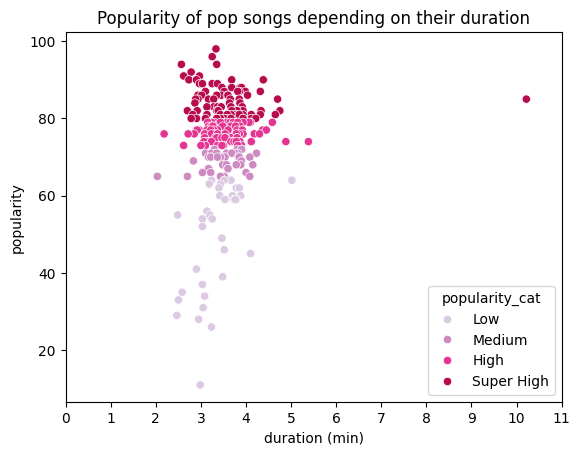

In [8]:
sns.scatterplot(data=pop_df, x="duration", y="popularity", hue="popularity_cat", palette="PuRd")
ax = plt.gca()

ax.set_xticks(range(0, max(df['duration']) + 1, 60))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x / 60)))
plt.title("Popularity of pop songs depending on their duration")
plt.xlabel("duration (min)")
plt.show()

💡 It looks like the duration to be prioritized in order to make a popular pop song is around **3 minutes**.

## 🥁 3. Which tempo should be prioritized ?
---

Here we are going to compare the popularity of pop songs with their tempo in order to find a correlation between those data.

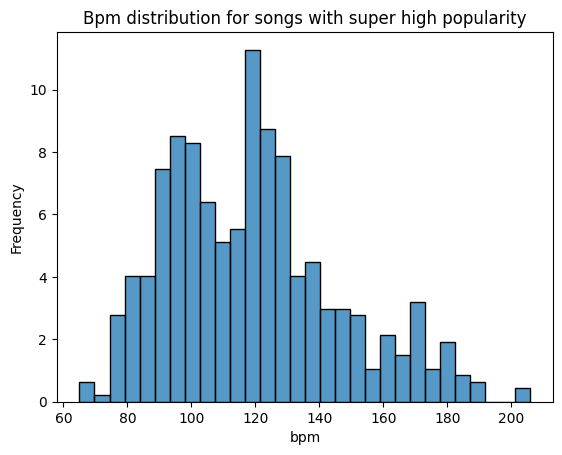

In [10]:
popular_df = df[df["popularity_cat"] == "Super High"]

sns.histplot(data=popular_df, x="bpm", stat="frequency", bins=30)

plt.title("Bpm distribution for songs with super high popularity")
plt.show()

💡 It looks like the popular pop songs have a tempo between 90 and 130 bpm, even though the tempo that is the most present in popular songs is around 120 bpm.

## 4. 🗨️ Which words should be prioritized ?
---

In order to figure out which words the most popular songs are made of, we are going to need to fetch the song lyrics from the spotify API using `spotipy`.

In [20]:
import spotipy

from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials

load_dotenv()

song = pop_df.iloc[1]
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
result = spotify.search(q=f"track:{song['title']}, artist:{song['artist']}", type="track", limit=1)

<built-in method keys of dict object at 0x7188dbbf1b00>


In [22]:
print(result["tracks"]["items"][0])

AttributeError: 'list' object has no attribute 'keys'